<h1 align="center"> Regresión Logística </h1>

Scikit-learn viene con algunos conjuntos de datos pequeños que no requieren descargar ningún archivo de algún sitio web externo. Estos conjuntos de datos son útiles para ilustrar rápidamente el comportamiento de los diversos algoritmos. Sin embargo, a menudo son demasiado pequeños para ser representativos de las tareas de aprendizaje automático del mundo real.

<b>Cada datapoint es una imagen de 8x8 de un dígito.</b>

Parámetros | Número
--- | ---
Clases | 10
Muestras por clase | ~180
Muestras totales | 1797
Dimensionalidad | 64

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

## Mostrando las imágenes y las etiquetas

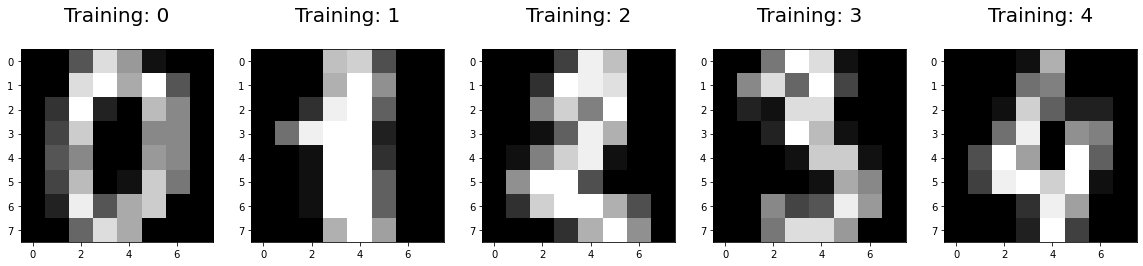

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## División de datos en conjuntos de entrenamiento y prueba

In [6]:
# test_size: what proportion of original data is used for test set
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

In [7]:
print(x_train.shape)

(1347, 64)


In [8]:
print(y_train.shape)

(1347,)


In [9]:
print(x_test.shape)

(450, 64)


In [10]:
print(y_test.shape)

(450,)


## Patrón de modelado de 4 pasos de Scikit-learn

<b>Paso 1: </b> Importe el modelo que desea utilizar

En sklearn, todos los modelos de aprendizaje automático se implementan como clases de Python

In [11]:
from sklearn.linear_model import LogisticRegression 

<b>Paso 2:</b> Cree una instancia del Modelo

In [12]:
logisticRegr = LogisticRegression()

<b>Paso 3:</b> Entrenamiento del modelo en los datos, almacenamiento de la información aprendida de los datos

El modelo está aprendiendo la relación entre `x` (dígitos) e `y` (etiquetas)

In [13]:
logisticRegr.fit(x_train, y_train)

d:\ANACONDA\envs\Pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

<b>Paso 4</b>: predecir las etiquetas de nuevos datos (nuevas imágenes)

Utiliza la información que el modelo aprendió durante el proceso de entrenamiento del modelo.

In [14]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [15]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [17]:
predictions.shape

(450,)

## Medición del rendimiento del modelo

accuracy (fracción de predicciones correctas): predicciones correctas / número total de puntos de datos

Básicamente, cómo se comporta el modelo con nuevos datos (conjunto de prueba)

In [18]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


## Matriz de confusión (Matplotlib)

Una matriz de confusión es una tabla que se usa a menudo para describir el rendimiento de un modelo de clasificación (o "clasificador") en un conjunto de datos de prueba para los cuales se conocen los valores verdaderos.

In [21]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


<Figure size 432x288 with 0 Axes>

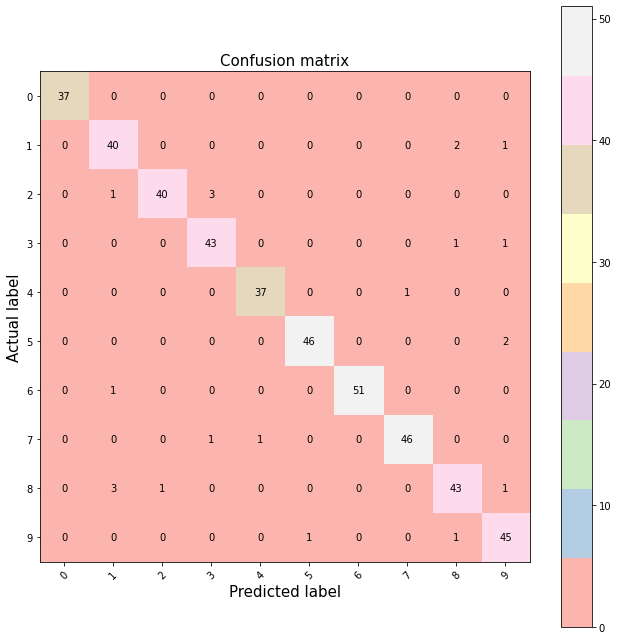

In [22]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

## Matriz de confusión (Seaborn)

In [144]:
# !conda install seaborn -y

In [23]:
# Make predictions on test data
predictions = logisticRegr.predict(x_test)

In [24]:
cm = metrics.confusion_matrix(y_test, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

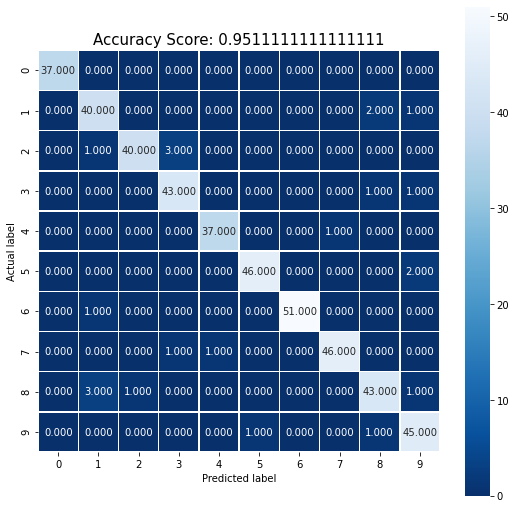

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Mostrar imágenes mal clasificadas

In [26]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

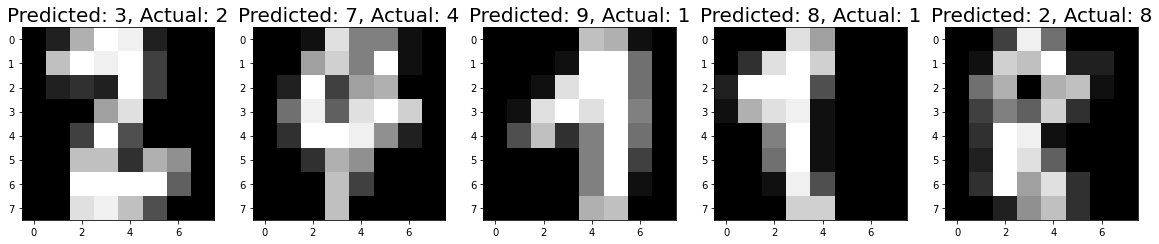

In [27]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)